In [428]:
import pandas as pd
import numpy as np
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
#msft.info

# get historical market data
data = msft.history(period="max")

data = data.loc["2010-01-01":].copy()

In [ ]:
hist = data.copy(deep=True)
hist["Tomorrow"] = hist["Close"].shift(-1)
hist["Target"] = (hist["Tomorrow"] > hist["Close"]).astype(int)

horizons = [2,5,60,250,1000]

for horizon in horizons:
    rolling_averages = hist.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    hist[ratio_column] = hist["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    hist[trend_column] = hist.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]
    
hist['SMA10'] = hist['Close'].rolling(10).mean()
hist['Dec_SMA10'] = hist.SMA10 < hist.SMA10.shift()
hist['SMA30'] = hist['Close'].rolling(30).mean()
hist['Dec_SMA30'] = hist.SMA30 < hist.SMA30.shift()

In [340]:
hist= data.copy(deep=True)
hist["Change"] = hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"] #price increased (1) or decreased (0)
hist = hist.iloc[1:]#remove 1st line
hist['Change'] = hist['Change'].astype(int)

hist['SMA10'] = hist['Close'].rolling(10).mean()
hist['Dec_SMA10'] = hist.SMA10 < hist.SMA10.shift()
hist['SMA30'] = hist['Close'].rolling(30).mean()
hist['Dec_SMA30'] = hist.SMA30 < hist.SMA30.shift()
hist["delta_1"] = hist.rolling(2).apply(lambda x: x.iloc[1] - x.iloc[0])["Close"]
#hist.dropna(inplace=True)


In [ ]:
del hist['Dividends']
del hist['Stock Splits']

In [341]:
hist.head(30)

,Open,High,Low,Close,Volume,Change,SMA10,Dec_SMA10,SMA30,Dec_SMA30,delta_1
Date,,,,,,,,,,,
2010-01-05 00:00:00-05:00,23.496212,23.686619,23.336270,23.579990,49749600,1,NaN,False,NaN,False,NaN
2010-01-06 00:00:00-05:00,23.519052,23.671378,23.244867,23.435274,58182400,0,NaN,False,NaN,False,-0.144716
2010-01-07 00:00:00-05:00,23.328641,23.381956,22.993526,23.191549,50559700,0,NaN,False,NaN,False,-0.243725
2010-01-08 00:00:00-05:00,23.062082,23.519057,23.031616,23.351500,51197400,1,NaN,False,NaN,False,0.159950
2010-01-11 00:00:00-05:00,23.389572,23.427654,22.940213,23.054457,68754700,0,NaN,False,NaN,False,-0.297043
2010-01-12 00:00:00-05:00,22.963064,23.153471,22.780274,22.902134,65912100,0,NaN,False,NaN,False,-0.152323
2010-01-13 00:00:00-05:00,23.046844,23.244867,22.856437,23.115391,51863500,1,NaN,False,NaN,False,0.213257
2010-01-14 00:00:00-05:00,23.084933,23.686619,23.046852,23.579990,63228100,1,NaN,False,NaN,False,0.464600
2010-01-15 00:00:00-05:00,23.671382,23.793242,23.389579,23.503824,79913200,0,NaN,False,NaN,False,-0.076166


In [342]:
from typing import Callable
# Define function to calculate the RSI
def calc_rsi(over: pd.Series, fn_roll: Callable) -> pd.Series:
    # Get the difference in price from previous step
    delta = over.diff()
    # Get rid of the first row, which is NaN since it did not have a previous row to calculate the differences
    delta = delta[1:] 

    # Make the positive gains (up) and negative gains (down) Series
    up, down = delta.clip(lower=0), delta.clip(upper=0).abs()

    roll_up, roll_down = fn_roll(up), fn_roll(down)
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))

    # Avoid division-by-zero if `roll_down` is zero
    # This prevents inf and/or nan values.
    rsi[:] = np.select([roll_down == 0, roll_up == 0, True], [100, 0, rsi])
    rsi.name = 'rsi'

    # Assert range
    valid_rsi = rsi[length - 1:]
    assert ((0 <= valid_rsi) & (valid_rsi <= 100)).all()
    # Note: rsi[:length - 1] is excluded from above assertion because it is NaN for SMA.

    return rsi

In [343]:
# Window length for moving average
length = 10
# Calculate RSI using MA of choice
# Reminder: Provide ≥ `1 + length` extra data points!
hist['rsi_ema'] = calc_rsi(hist['Close'], lambda s: s.ewm(span=length).mean())
hist['rsi_sma'] = calc_rsi(hist['Close'], lambda s: s.rolling(length).mean())
hist['rsi_rma'] = calc_rsi(hist['Close'], lambda s: s.ewm(alpha=1 / length).mean())  

In [344]:
hist.head(30)

,Open,High,Low,Close,Volume,Change,SMA10,Dec_SMA10,SMA30,Dec_SMA30,delta_1,rsi_ema,rsi_sma,rsi_rma
Date,,,,,,,,,,,,,,
2010-01-05 00:00:00-05:00,23.496212,23.686619,23.336270,23.579990,49749600,1,NaN,False,NaN,False,NaN,NaN,NaN,NaN
2010-01-06 00:00:00-05:00,23.519052,23.671378,23.244867,23.435274,58182400,0,NaN,False,NaN,False,-0.144716,0.000000,NaN,0.000000
2010-01-07 00:00:00-05:00,23.328641,23.381956,22.993526,23.191549,50559700,0,NaN,False,NaN,False,-0.243725,0.000000,NaN,0.000000
2010-01-08 00:00:00-05:00,23.062082,23.519057,23.031616,23.351500,51197400,1,NaN,False,NaN,False,0.159950,35.058539,NaN,32.214083
2010-01-11 00:00:00-05:00,23.389572,23.427654,22.940213,23.054457,68754700,0,NaN,False,NaN,False,-0.297043,19.523032,NaN,19.351075
2010-01-12 00:00:00-05:00,22.963064,23.153471,22.780274,22.902134,65912100,0,NaN,False,NaN,False,-0.152323,15.279430,NaN,15.764499
2010-01-13 00:00:00-05:00,23.046844,23.244867,22.856437,23.115391,51863500,1,NaN,False,NaN,False,0.213257,38.247722,NaN,34.615872
2010-01-14 00:00:00-05:00,23.084933,23.686619,23.046852,23.579990,63228100,1,NaN,False,NaN,False,0.464600,64.136742,NaN,57.590358
2010-01-15 00:00:00-05:00,23.671382,23.793242,23.389579,23.503824,79913200,0,NaN,False,NaN,False,-0.076166,59.166560,NaN,54.126020


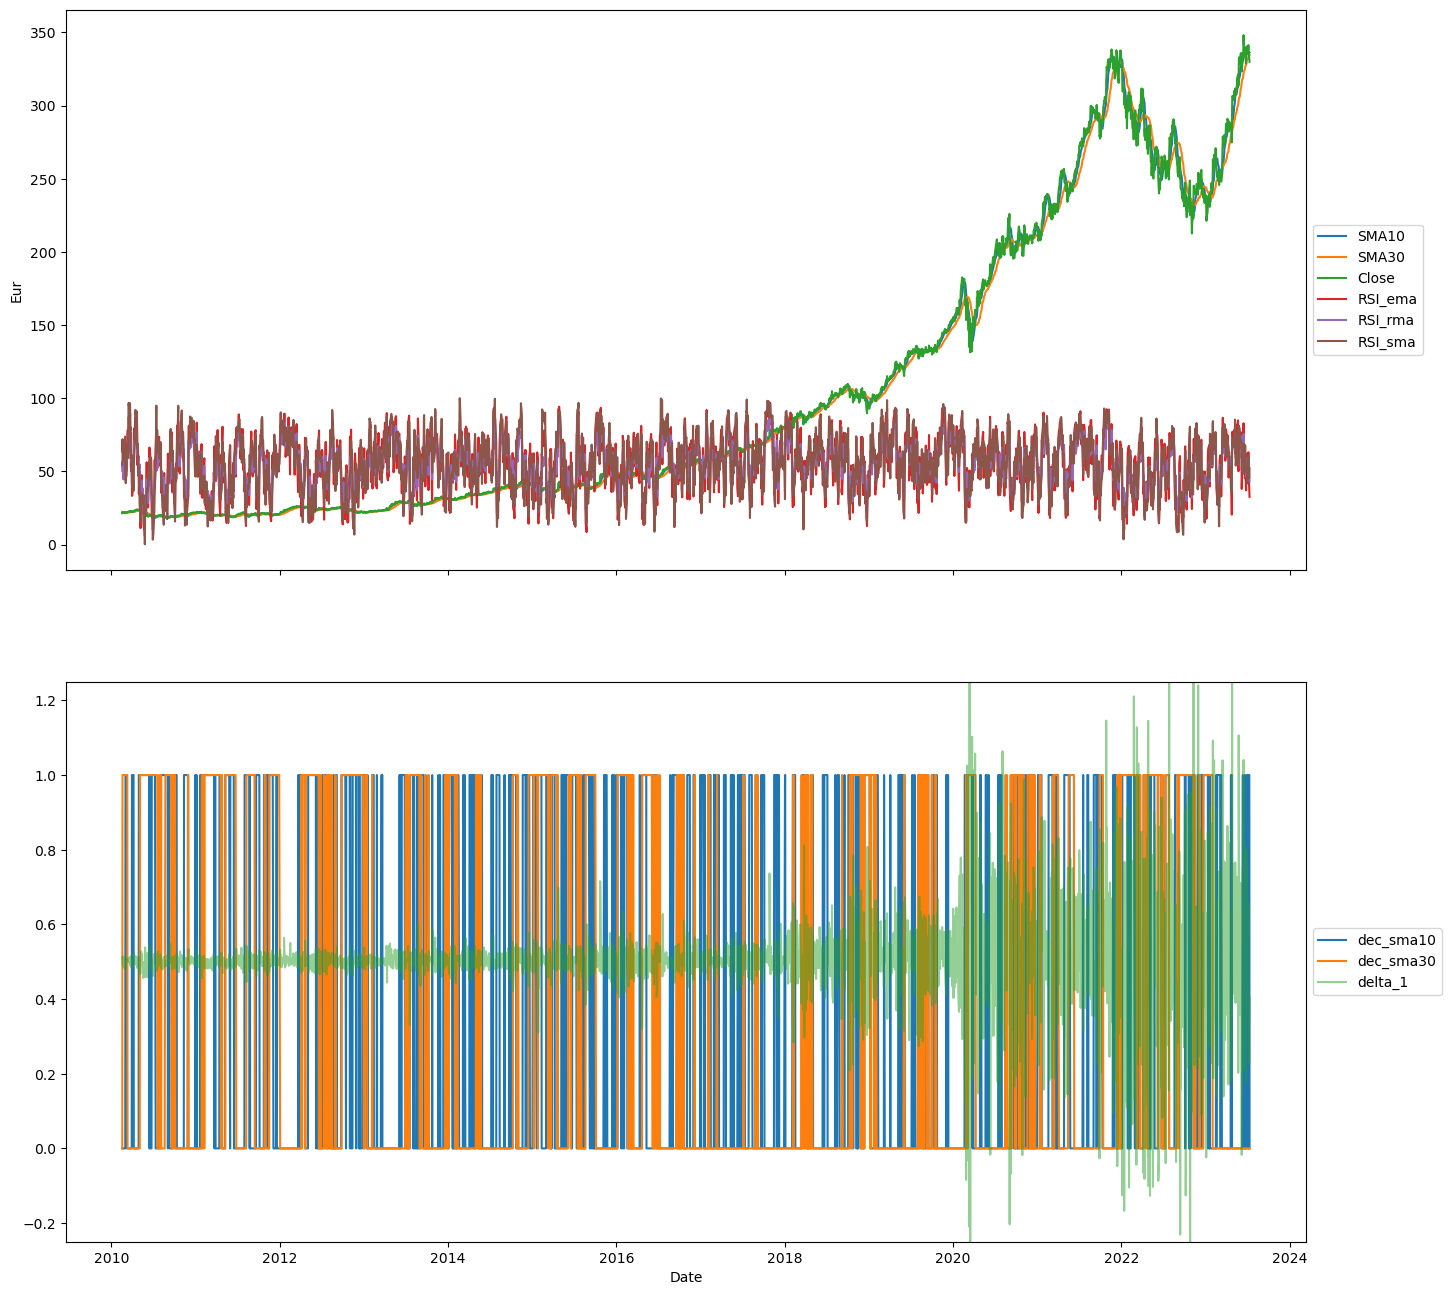

In [345]:
import matplotlib.pyplot as plt
hist.dropna(inplace=True)

fig, ax = plt.subplots(2,1, sharex= True,figsize=(16,16))
ax[0].plot(hist['SMA10'], label = 'SMA10')
ax[0].plot(hist['SMA30'], label = 'SMA30')
ax[0].plot(hist['Close'], label = 'Close')

ax[0].plot(hist['rsi_ema'], label = 'RSI_ema')
ax[0].plot(hist['rsi_rma'], label = 'RSI_rma')
ax[0].plot(hist['rsi_sma'], label = 'RSI_sma')

ax[1].plot(hist['Dec_SMA10'], label = 'dec_sma10')
ax[1].plot(hist['Dec_SMA30'], label = 'dec_sma30')

#ax[1].plot((hist['SMA30'] < hist['SMA10']), label = 'sma30 < sma10')
ax[1].plot(hist['delta_1']/max(hist['delta_1'])+0.5, label = 'delta_1', alpha = 0.5)


ax[0].set_ylabel('Eur')
ax[1].set_xlabel('Date')
# Put a legend to the right of the current axis
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylim([-0.25,1.25])

plt.show()

Decomposition

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

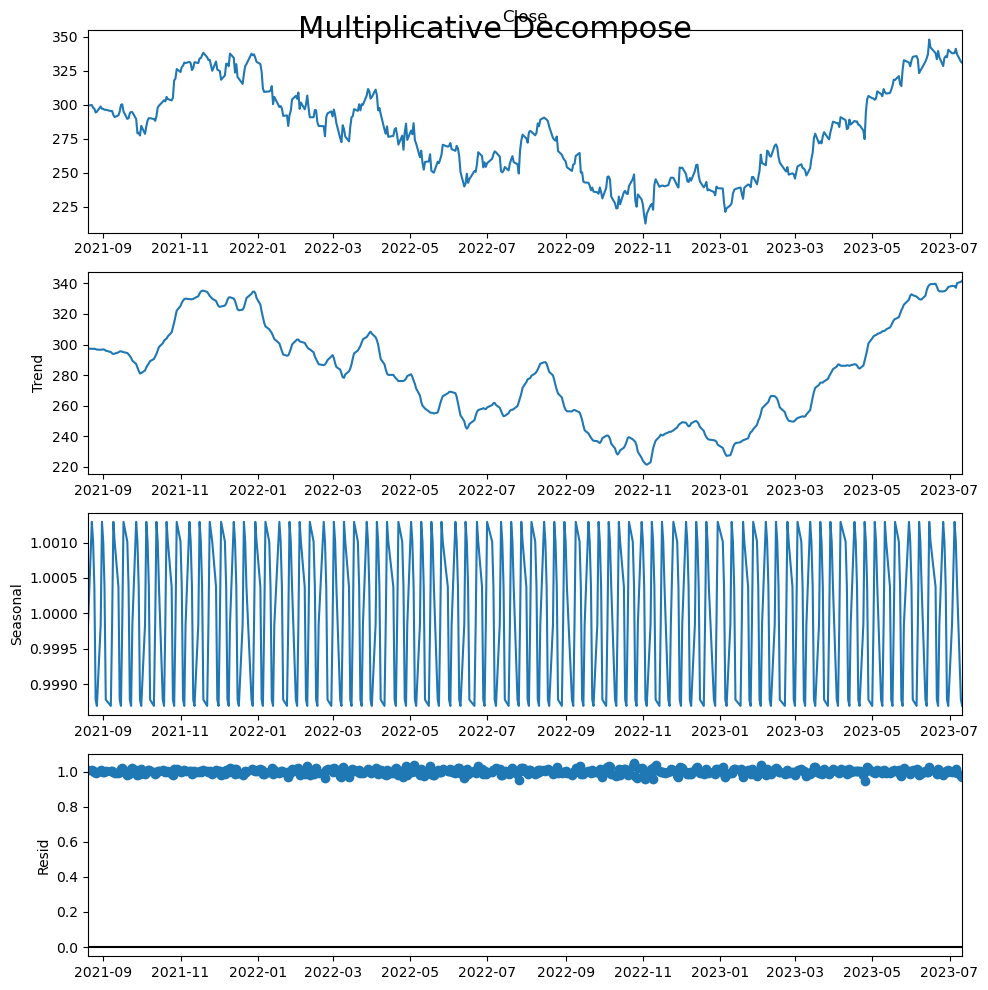

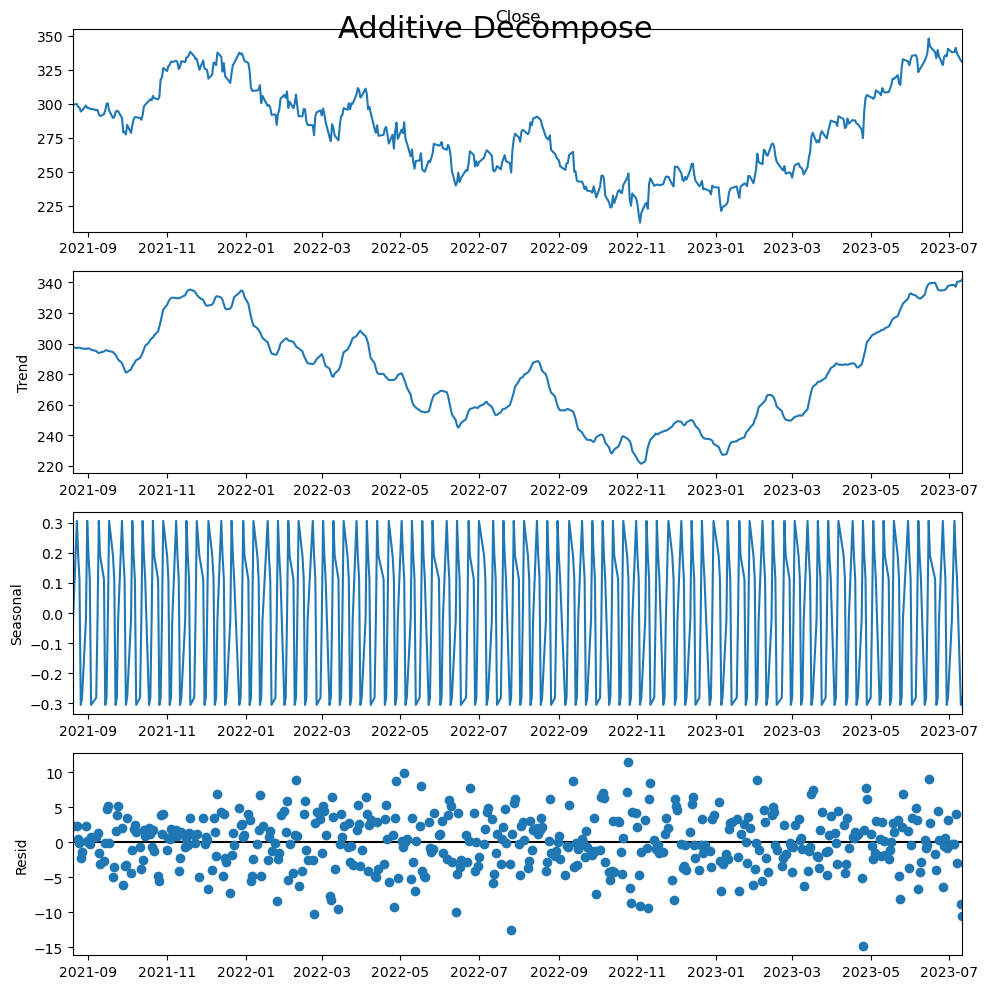

In [191]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(hist['Close'], model='multiplicative', extrapolate_trend='freq', period=6)

# Additive Decomposition
result_add = seasonal_decompose(hist['Close'], model='additive', extrapolate_trend='freq', period=6)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Stacionarity

Check series stacionarity

In [192]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(hist['Close'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(hist['Close'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.5008561359711579
p-value: 0.533087778250519
Critial Values:
   1%, -3.444250937448703
Critial Values:
   5%, -2.867669873870454
Critial Values:
   10%, -2.5700349866579657

KPSS Statistic: 0.947800
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\arvyd\.conda\envs\DS-Sample\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [279]:
#Baseline Model

In [346]:
def SlidingWindow(in_df,window_size, period_shift = 1):
    #window_size determines how many data points in the past we are interested
    column_names = [(x+'_'+str(y+1)) for y in range(0,window_size) for x in in_df.columns]
    column_names.extend(['next_day_Close', 'next_day_Change'])
    df = pd.DataFrame(columns = column_names)
    for row_i in range(0,in_df.shape[0]-window_size+1, period_shift):
        window_data = []
        for i in range(window_size):
            window_data.extend(in_df.iloc[row_i+i].values)
        try:
            window_data.append(in_df.iloc[row_i+i+1]['Close'])
            window_data.append(in_df.iloc[row_i+i+1]['Change'])
        except:
            window_data.append(0)
            window_data.append(0)
        df.loc[in_df.index[row_i]] = window_data
    return df

In [406]:
df = hist.copy(deep=True)
df.dropna(inplace=True)
history = 5 #how many previosu data points will be used for prediction
df = SlidingWindow(df, history)
predictors = ['Close', 'Volume', 'Open', 'High', 'Low', 'rsi_ema']
predictors = [(x+'_'+str(y+1)) for y in range(0,history) for x in predictors]
print(predictors)

['Close_1', 'Volume_1', 'Open_1', 'High_1', 'Low_1', 'rsi_ema_1', 'Close_2', 'Volume_2', 'Open_2', 'High_2', 'Low_2', 'rsi_ema_2', 'Close_3', 'Volume_3', 'Open_3', 'High_3', 'Low_3', 'rsi_ema_3', 'Close_4', 'Volume_4', 'Open_4', 'High_4', 'Low_4', 'rsi_ema_4', 'Close_5', 'Volume_5', 'Open_5', 'High_5', 'Low_5', 'rsi_ema_5']


In [378]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [384]:
def predict(train, test, predictors, target, model):
    model.fit(train[predictors], train[target])
    preds = model.predict(test[predictors])
    preds[preds >=.5] = 1
    preds[preds <.5] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test[target], preds], axis = 1)
    return combined

In [385]:
# ______________ MULTIPLE LINEAR REGRESSION ______________ #

target = 'next_day_Change'
nr_test_samples = int(df.shape[0]*0.2) 
train = df.iloc[:-nr_test_samples]
test = df.iloc[-nr_test_samples:]

lr_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Lets see if we can predict whether tomorrow closing price will be higher (1) or lower(0) than previous day
model_out = predict(train, test, predictors, target, lr_model)

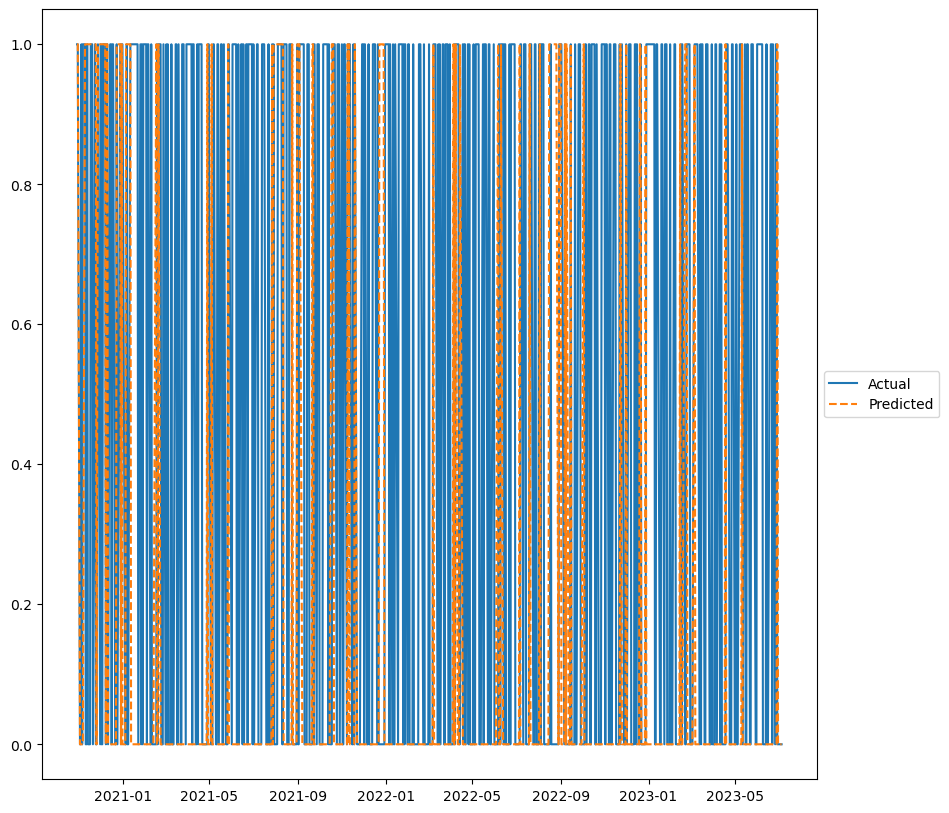

In [386]:
fig, ax = plt.subplots()
ax.plot(model_out[target], label='Actual')
ax.plot(model_out['Predictions'], linestyle ='dashed',label='Predicted')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [387]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model_out[target], model_out['Predictions']))

0.49925705794947994


In [388]:
from sklearn.metrics import precision_score
precision_score(model_out[target], model_out['Predictions'])

0.49514563106796117

#Back Testing

In [389]:
def backtest(data, model, predictors, target, start=2500, step=250): 
    #start 2500 - indicates last 10 years, approx 250 trading days per year
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, target, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [390]:
target = 'next_day_Change'
predictions = backtest(df, lr_model, predictors, target)

In [391]:
predictions["Predictions"].value_counts()

0    498
1    370
Name: Predictions, dtype: int64

In [393]:
precision_score(predictions[target], predictions['Predictions'])

0.5054054054054054

In [392]:
predictions[target].value_counts() / predictions.shape[0]

1    0.514977
0    0.485023
Name: next_day_Change, dtype: float64

Lets introduce more predictors

In [394]:
hist.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'SMA10',
       'Dec_SMA10', 'SMA30', 'Dec_SMA30', 'delta_1', 'rsi_ema', 'rsi_sma',
       'rsi_rma'],
      dtype='object')

In [395]:
predictors = ['Close', 'Volume', 'Open', 'High', 'Low', 'rsi_ema','rsi_sma', 'rsi_rma', 'SMA10', 'SMA30']
predictors = [(x+'_'+str(y+1)) for y in range(0,history) for x in predictors]
print(predictors)

['Close_1', 'Volume_1', 'Open_1', 'High_1', 'Low_1', 'rsi_ema_1', 'rsi_sma_1', 'rsi_rma_1', 'SMA10_1', 'SMA30_1', 'Close_2', 'Volume_2', 'Open_2', 'High_2', 'Low_2', 'rsi_ema_2', 'rsi_sma_2', 'rsi_rma_2', 'SMA10_2', 'SMA30_2', 'Close_3', 'Volume_3', 'Open_3', 'High_3', 'Low_3', 'rsi_ema_3', 'rsi_sma_3', 'rsi_rma_3', 'SMA10_3', 'SMA30_3', 'Close_4', 'Volume_4', 'Open_4', 'High_4', 'Low_4', 'rsi_ema_4', 'rsi_sma_4', 'rsi_rma_4', 'SMA10_4', 'SMA30_4', 'Close_5', 'Volume_5', 'Open_5', 'High_5', 'Low_5', 'rsi_ema_5', 'rsi_sma_5', 'rsi_rma_5', 'SMA10_5', 'SMA30_5']


In [396]:
target = 'next_day_Change'
nr_test_samples = int(df.shape[0]*0.2) 
train = df.iloc[:-nr_test_samples]
test = df.iloc[-nr_test_samples:]

lr_model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Lets see if we can predict whether tomorrow closing price will be higher (1) or lower(0) than previous day
model_out = predict(train, test, predictors, target, lr_model)

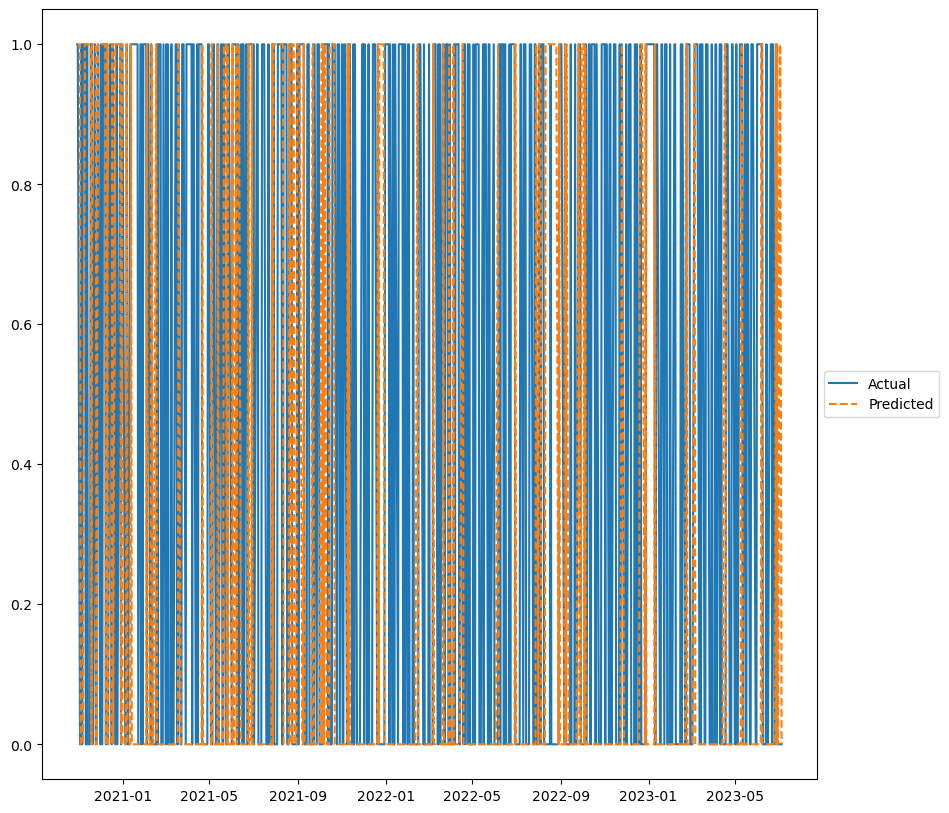

In [397]:
fig, ax = plt.subplots()
ax.plot(model_out[target], label='Actual')
ax.plot(model_out['Predictions'], linestyle ='dashed',label='Predicted')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [398]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model_out[target], model_out['Predictions']))

0.4903417533432392


In [399]:
from sklearn.metrics import precision_score
precision_score(model_out[target], model_out['Predictions'])

0.4740740740740741

add more moving averages

In [424]:
df = hist.copy(deep=True)
df.dropna(inplace=True)
history = 5 #how many previosu data points will be used for prediction
df = SlidingWindow(df, history)

In [425]:
horizons = [2,5,60,250]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()['Change']
    
    new_predictors+= [ratio_column, trend_column]

KeyError: 'Close'

In [413]:
df.head()

,Open,High,Low,Close,Volume,Change,SMA10,Dec_SMA10,SMA30,Dec_SMA30,...,rsi_sma,rsi_rma,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-17 00:00:00-05:00,21.830844,21.922666,21.700762,21.876755,45882900,1,21.437242,False,22.345546,False,...,54.604126,50.480520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-18 00:00:00-05:00,21.876751,22.213435,21.815536,22.167522,42856500,1,21.473455,False,22.298463,True,...,57.730015,56.608313,1.006602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-19 00:00:00-05:00,22.029790,22.129264,21.953271,22.014486,44451800,0,21.554533,False,22.251104,True,...,71.407276,52.788250,0.996536,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-22 00:00:00-05:00,22.068048,22.144568,21.922662,21.983877,36707100,0,21.618840,False,22.210848,True,...,67.990976,52.008280,0.999304,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-23 00:00:00-05:00,21.945627,22.060405,21.494165,21.677811,52266200,0,21.675391,False,22.155058,True,...,65.162675,44.674584,0.992990,0.0,0.987866,NaN,NaN,NaN,NaN,NaN


In [414]:
df = df.dropna()

In [416]:
df.head()

,Open,High,Low,Close,Volume,Change,SMA10,Dec_SMA10,SMA30,Dec_SMA30,...,rsi_sma,rsi_rma,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-11 00:00:00-05:00,21.583126,21.621999,21.046657,21.186605,83939700,0,21.635994,True,21.893601,True,...,39.035244,35.626452,0.995434,0.0,0.978808,3.0,0.989644,31.0,1.021725,128.0
2011-02-14 00:00:00-05:00,21.155495,21.202146,20.953349,21.171045,56766200,0,21.597119,True,21.875978,True,...,39.034908,35.339464,0.999633,0.0,0.984952,2.0,0.987924,31.0,1.021171,127.0
2011-02-15 00:00:00-05:00,21.147594,21.374398,21.077206,21.085026,44116500,0,21.529426,True,21.853673,True,...,29.568495,33.673301,0.997964,0.0,0.989257,1.0,0.983150,31.0,1.017204,126.0
2011-02-16 00:00:00-05:00,21.155412,21.171054,20.803474,21.131950,70817900,1,21.470314,True,21.830081,True,...,32.244463,35.516066,1.001112,0.0,0.997208,0.0,0.984452,30.0,1.019636,126.0
2011-02-17 00:00:00-05:00,21.092844,21.405679,21.045919,21.280544,57207300,1,21.448608,True,21.813776,True,...,43.164659,41.258364,1.003504,1.0,1.005173,1.0,0.990393,31.0,1.026884,127.0


Rerun the model

In [423]:
df

,Open_1,High_1,Low_1,Close_1,Volume_1,Change_1,SMA10_1,Dec_SMA10_1,SMA30_1,Dec_SMA30_1,...,SMA10_5,Dec_SMA10_5,SMA30_5,Dec_SMA30_5,delta_1_5,rsi_ema_5,rsi_sma_5,rsi_rma_5,next_day_Close,next_day_Change
2010-02-17 00:00:00-05:00,21.830844,21.922666,21.700762,21.876755,45882900,1,21.437242,False,22.345546,False,...,21.675391,False,22.155058,True,-0.306067,44.620847,65.162675,44.674584,21.907362,1
2010-02-18 00:00:00-05:00,21.876751,22.213435,21.815536,22.167522,42856500,1,21.473455,False,22.298463,True,...,21.732809,False,22.116822,True,0.229551,55.556175,65.324086,50.492206,21.884403,0
2010-02-19 00:00:00-05:00,22.029790,22.129264,21.953271,22.014486,44451800,0,21.554533,False,22.251104,True,...,21.789454,False,22.082898,True,-0.022959,54.246758,65.055516,49.908995,21.937963,1
2010-02-22 00:00:00-05:00,22.068048,22.144568,21.922662,21.983877,36707100,0,21.618840,False,22.210848,True,...,21.841555,False,22.043650,True,0.053560,57.127902,64.190423,51.365127,22.205790,1
2010-02-23 00:00:00-05:00,21.945627,22.060405,21.494165,21.677811,52266200,0,21.675391,False,22.155058,True,...,21.934908,False,21.997843,True,0.267826,69.042300,73.828353,58.128018,21.777277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,334.660004,337.980011,333.809998,335.850006,20259500,1,337.312997,False,329.430667,False,...,335.903998,False,332.424334,False,0.160004,55.186430,50.131587,55.630832,341.269989,1
2023-06-29 00:00:00-04:00,334.709991,336.109985,332.619995,335.049988,16997000,0,337.083997,True,330.230333,False,...,336.674997,False,333.094000,False,3.119995,63.112908,60.524139,59.412654,337.220001,0
2023-06-30 00:00:00-04:00,337.750000,342.730011,337.200012,340.540009,26823800,1,336.327997,True,331.115000,False,...,336.425998,True,333.826000,False,-4.049988,49.283036,46.394457,52.908344,331.829987,0
2023-07-03 00:00:00-04:00,339.190002,340.899994,336.570007,337.989990,12508700,0,335.893997,True,331.764000,False,...,336.106998,True,334.425333,False,-5.390015,36.332634,45.472610,45.536508,329.920013,0


In [ ]:
predictors = [(x+'_'+str(y+1)) for y in range(0,history) for x in predictors]
predictors = predictors + new_predictors

In [417]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [421]:
predictors = predictors + new_predictors
target = 'next_day_Change'
model_out = predict(train, test, predictors, target, lr_model)

KeyError: "['Close_2', 'Volume_2', 'Open_2', 'High_2', 'Low_2', 'rsi_ema_2', 'Close_3', 'Volume_3', 'Open_3', 'High_3', 'Low_3', 'rsi_ema_3', 'Close_4', 'Volume_4', 'Open_4', 'High_4', 'Low_4', 'rsi_ema_4', 'Close_5', 'Volume_5', 'Open_5', 'High_5', 'Low_5', 'rsi_ema_5', 'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250'] not in index"

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_out[target], label='Actual')
ax.plot(model_out['Predictions'], linestyle ='dashed',label='Predicted')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Lets make prediciton for tomorrow

In [198]:
last_df = SlidingWindow(hist.iloc[-5:], 5)
lr_y_pred = np.round(lr_model.predict(last_df.values[0][:-2].reshape(1, -1)))
print("Tomorrow expected Close price: INcrease" if lr_y_pred[0] == 1 else "Tomorrow expected Close price: DEcrease")

Tomorrow expected Close price: DEcrease


C:\Users\arvyd\.conda\envs\DS-Sample\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Lets try predicting closing prices 

In [290]:
# ______________ MULTIPLE LINEAR REGRESSION ______________ #
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
target = 'next_day_Close'

lr_model = LinearRegression()
#train, test = train_test_split(df, test_size=0.2, random_state=1) gives data leakage into model
train = df.iloc[:-100]
test = df.iloc[-100:]

#Lets see if we can predict Closing Price
train_X, train_y = train[predictors], train[target]
test_X, test_y = test[predictors], test[target]

lr_model.fit(train_X, train_y)
lr_y_pred = lr_model.predict(test_X)
lr_y = test_y

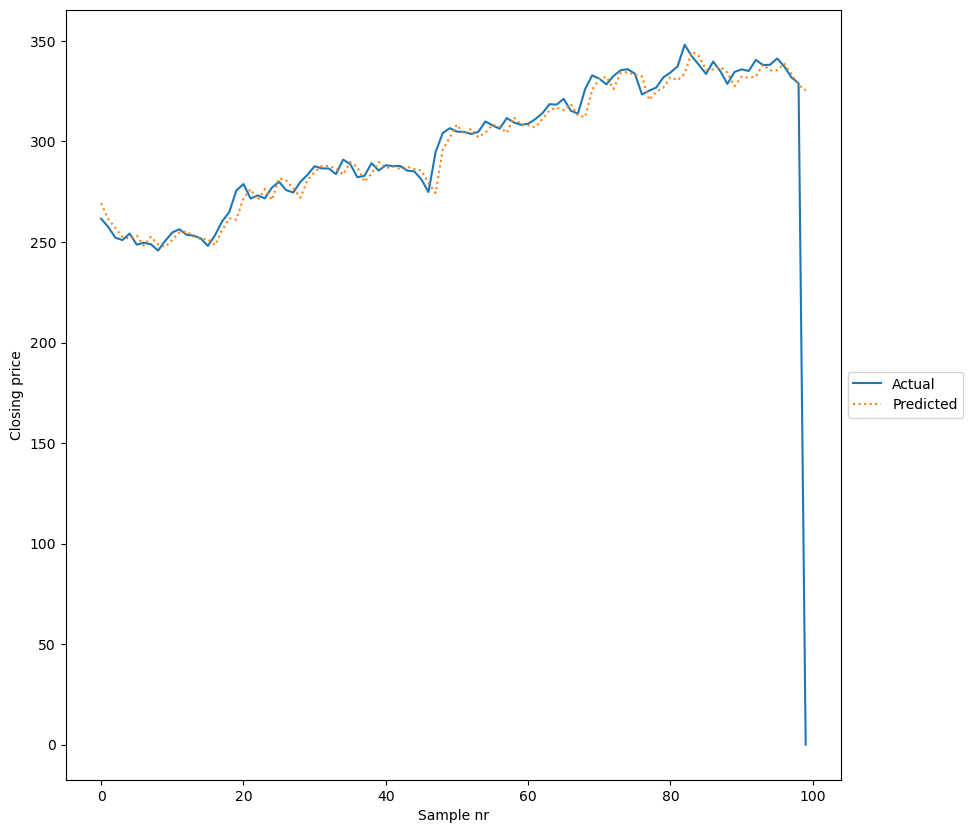

In [291]:
fig, ax = plt.subplots()
ax.plot(lr_y.values, label='Actual')
ax.plot(lr_y_pred, linestyle ='dotted',label='Predicted')
ax.set_ylabel('Closing price')
ax.set_xlabel('Sample nr')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [292]:
lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

RMSE = 32.93


#Lets try to see how that looks on the closing price comparison

In [203]:
change_from_pred_price = list(lr_y_pred > test_X['Close_5'].values)[0]
unique, counts = np.unique(np.array(change_from_pred_price), return_counts=True)
print('Change from pred price')
print(dict(zip(unique, counts)))
unique, counts = np.unique(np.array(test.iloc[:, [-1]].values), return_counts=True)
print('Change from test data')
print(dict(zip(unique, counts)))

Change from pred price
{False: 36, True: 58}
Change from test data
{0.0: 48, 1.0: 46}


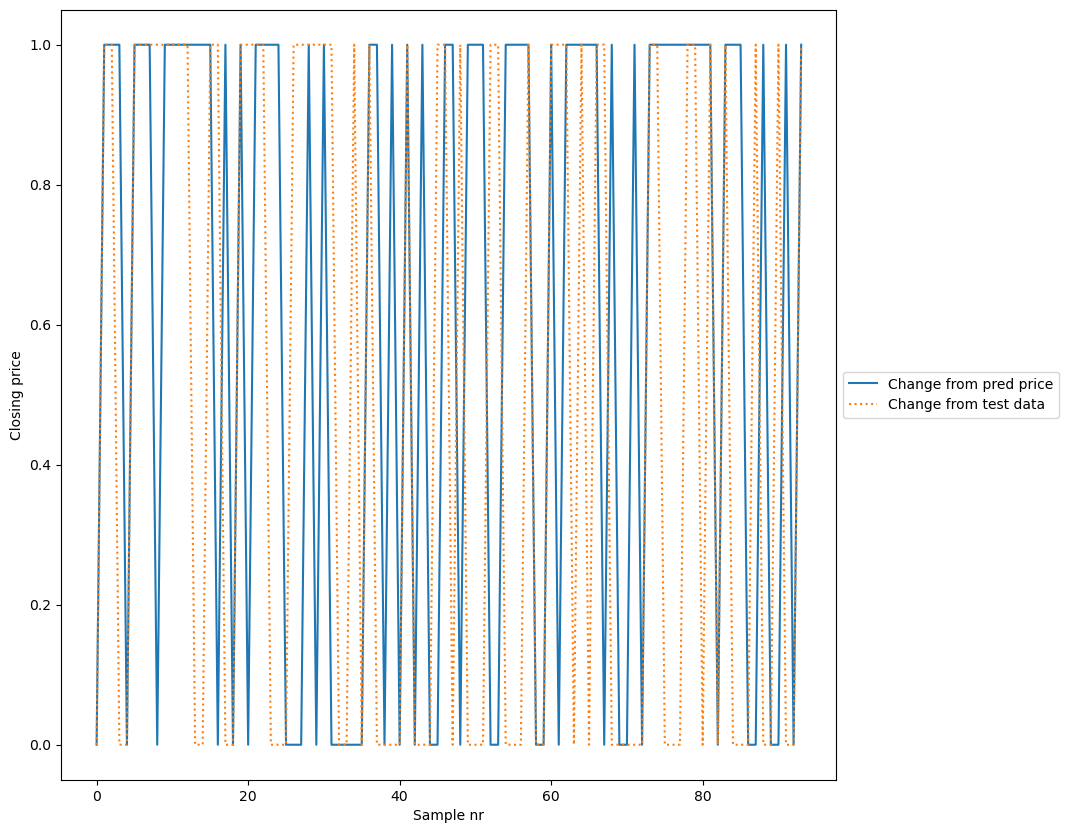

In [204]:
fig, ax = plt.subplots()
ax.plot(change_from_pred_price, label='Change from pred price')
ax.plot(test.iloc[:, [-1]].values, linestyle ='dotted',label='Change from test data')
ax.set_ylabel('Closing price')
ax.set_xlabel('Sample nr')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [205]:
from sklearn.metrics import accuracy_score
print(f'Estimated accuracy: {accuracy_score(test.iloc[:, [-1]].values, change_from_pred_price)*100} %')

Estimated accuracy: 53.191489361702125 %


So what if I increase the "window"? give more historic data?

In [206]:
df = hist.copy(deep=True)
df.dropna(inplace=True)
df = SlidingWindow(df, 10)
#print(df)

In [207]:
# ______________ MULTIPLE LINEAR REGRESSION ______________ #
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_model = LinearRegression()
train, test = train_test_split(df, test_size=0.2, random_state=1)

#Lets see if we can predict Closing Price
train_X, train_y = train.iloc[:,:-2], train.iloc[:, [-2]]
test_X, test_y = test.iloc[:,:-2], test.iloc[:, [-2]]

lr_model.fit(train_X, train_y)
lr_y_pred = lr_model.predict(test_X)
lr_y = test_y

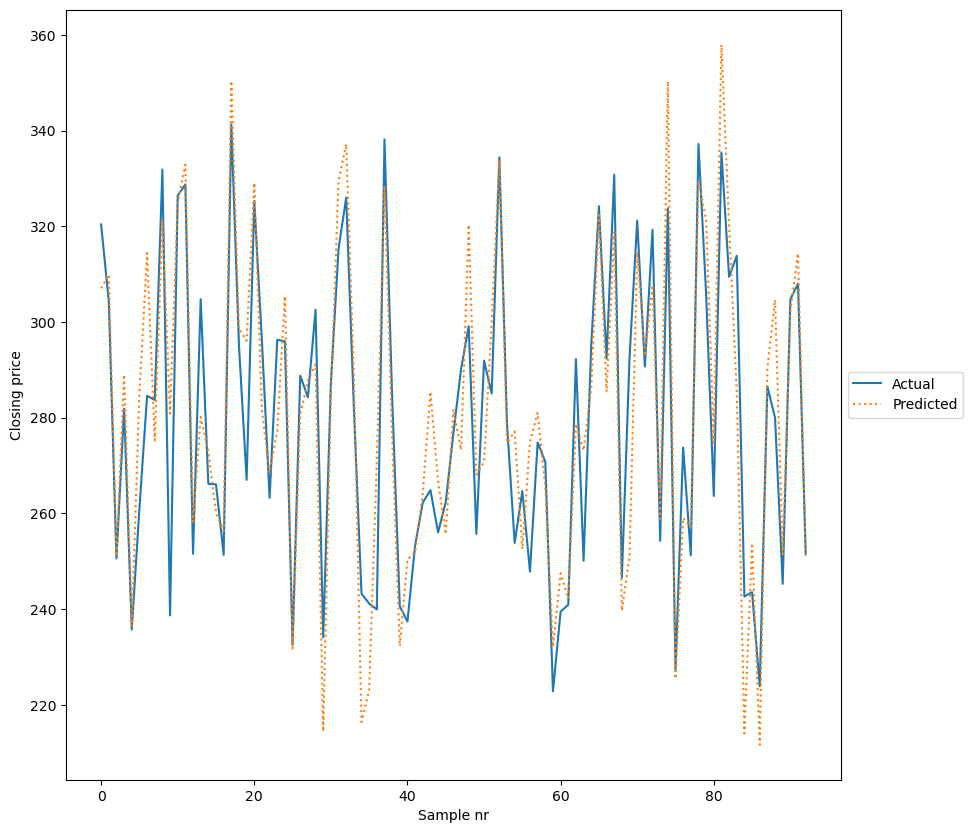

In [208]:
fig, ax = plt.subplots()
ax.plot(lr_y.values, label='Actual')
ax.plot(lr_y_pred, linestyle ='dotted',label='Predicted')
ax.set_ylabel('Closing price')
ax.set_xlabel('Sample nr')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [209]:
lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

RMSE = 14.99


In [ ]:
RMSE Increased - giving more historic data makes it worse

Whats RMSe evolution with window width?

In [210]:
RMSE = []
for window_range in range(1,10):
    df = hist.copy(deep=True)
    df.dropna(inplace=True)
    df = SlidingWindow(df, window_range)
    
    lr_model = LinearRegression()
    train, test = train_test_split(df, test_size=0.2)

    #Lets see if we can predict Closing Price
    train_X, train_y = train.iloc[:,:-2], train.iloc[:, [-2]]
    test_X, test_y = test.iloc[:,:-2], test.iloc[:, [-2]]

    lr_model.fit(train_X, train_y)
    lr_y_pred = lr_model.predict(test_X)
    lr_y = test_y
    
    lr_residuals = lr_y_pred - lr_y
    lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
    RMSE.append(lr_rmse)

C:\Users\arvyd\AppData\Local\Temp\ipykernel_19364\2913139399.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(0,10));


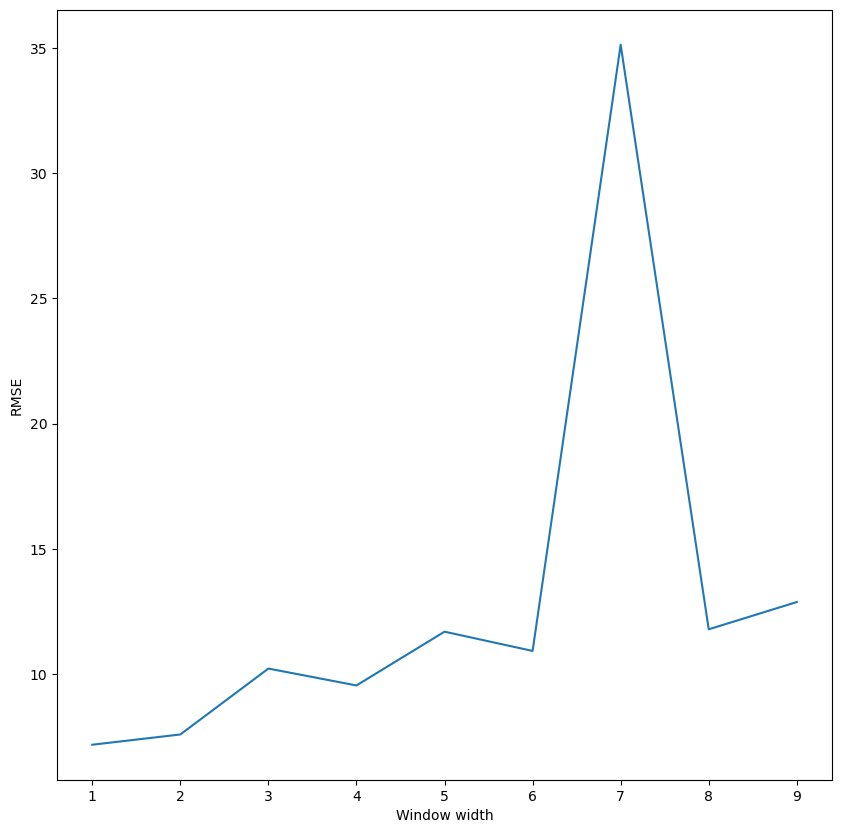

In [211]:
fig, ax = plt.subplots()
ax.plot(RMSE)
ax.set_ylabel('RMSE')
ax.set_xlabel('Window width')
ax.set_xticklabels(range(0,10));
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

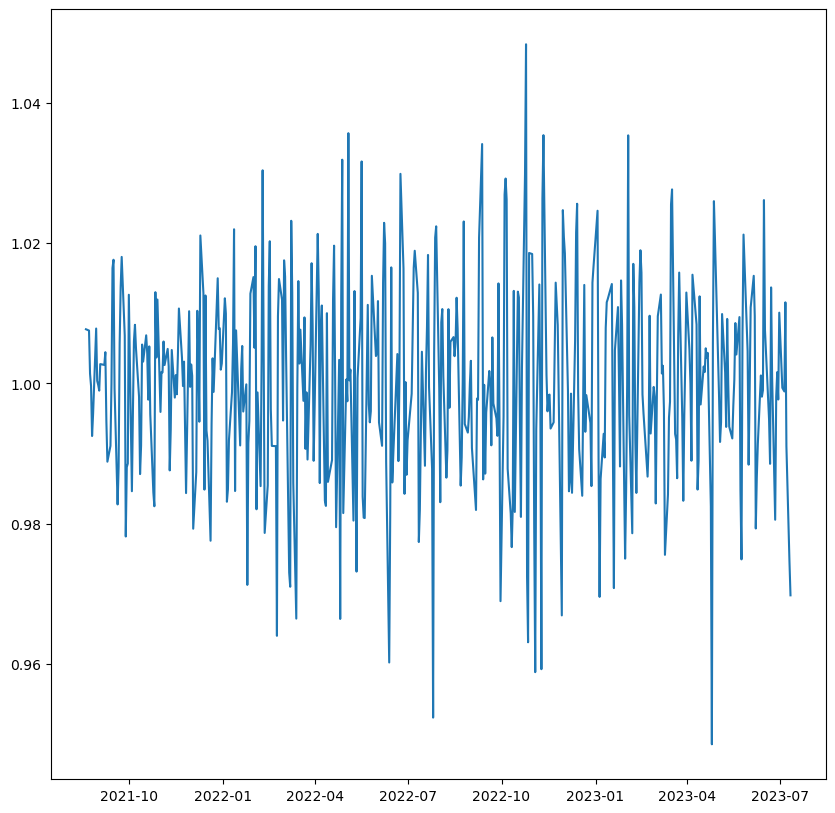

In [212]:
#multiplicative decompose residual
fig, ax = plt.subplots()
ax.plot(result_mul.resid)

In [ ]:
print(hist.index[-5])
print(hist.iloc[-5:])